### Notebook 1 Data Clean up

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd






We start our capstone project with loading our data set. We had three csv files due to the nature of the downloading from the MLS website. We concatenate these three files into one. 

In [16]:
#Load the three csv files into three pandas dataframes.
df = pd.read_csv('/Users/davidongtenco/Downloads/01_19-08_21 - Jan 1 2019- Aug 8 2021 (1).csv')
df1 = pd.read_csv('/Users/davidongtenco/Downloads/01_17-12_18 - Sheet1.csv')
df2 = pd.read_csv('/Users/davidongtenco/Downloads/09_21-10_22 - Sheet1.csv')

In [17]:
#Concat the three frames into one 
df_test = pd.concat([df, df1, df2], axis=0)

In [18]:
#Sanity Check
df_test

,Picture Count,Listing Pictures,ML #,Status,Address,City,Postal Code,S/A,Price,List Price,...,Fixtures Removed Y/N,Fixtures Remvd,Gross Taxes,Last Trans Date,Parking Places - Total,Distance to Pub/Rapid Tr,Dist to School/School Bus,Sold Price,Sold Date,Type
0,0,//cdnparap130.paragonrels.com/ParagonImages/St...,R2328951,T,20394 82B AVENUE,Langley,V2Y 0S2,F63,"$1,068,000","$1,068,000",...,No,NaN,"$5,389.07",1/2/2019,4.0,NaN,NaN,NaN,NaN,House/Single Family
1,0,//cdnparap130.paragonrels.com/ParagonImages/St...,R2329452,T,9749 129A STREET,Surrey,V3T 3J6,F25,"$1,250,000","$1,250,000",...,No,NaN,"$3,102.58",5/11/2019,8.0,NaN,NaN,NaN,NaN,House/Single Family
2,1,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2329714,T,41 4619 QUEENSWAY DRIVE,Terrace,V8G 3X5,N88TE,"$40,000","$40,000",...,No,NaN,$196.07,2/12/2019,2.0,NaN,NaN,NaN,NaN,Manufactured
3,1,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2329300,T,19547 THORBURN WAY,Pitt Meadows,V3Y 0B3,VPISM,"$1,248,000","$1,248,000",...,Yes,ELECTRIC FIREPLACE IN MASTER BEDROOM,"$5,116.27",5/24/2019,4.0,2 BLOCKS,2 BLOCKS,NaN,NaN,House/Single Family
4,1,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2329141,S,6107 IMPERIAL STREET,Burnaby,V5T 1G6,VBSUD,"$1,250,000","$1,330,000",...,No,NaN,"$5,606.00",3/6/2019,3.0,NaN,NaN,"$1,250,000",2/26/2019,House/Single Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40754,40,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2733474,S,1210 SPRICE AVENUE,Coquitlam,V3J 2P4,VCQCC,"$1,620,000","$1,700,000",...,No,NaN,"$4,868.41",11/1/2022,5.0,1 BLOCK,2 BLOCKS,"$1,620,000",10/31/2022,House/Single Family
40755,20,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2733435,S,6431 UDY ROAD,Richmond,V7C 2X8,VRI23,"$1,915,000","$1,899,000",...,No,NaN,"$6,593.00",10/31/2022,1.0,NaN,NaN,"$1,915,000",10/24/2022,House/Single Family
40756,0,//cdnparap130.paragonrels.com/ParagonImages/St...,R2734432,C,9254 125 STREET,Surrey,V3V 4X4,F31,"$1,299,233","$1,299,233",...,No,NaN,"$5,606.00",11/2/2022,NaN,NaN,NaN,NaN,NaN,House/Single Family
40757,20,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2734270,C,3159 TOWNLINE ROAD,Abbotsford,V2T 5J2,F74,"$1,099,000","$1,099,000",...,No,NaN,"$4,165.73",10/31/2022,8.0,NaN,NaN,NaN,NaN,House/Single Family


Based on the information below, we can see that 2.5% of the data is duplicated. As the ML # is used as a unique identifyer for the listing. We can understand that there are duplicated listing showing in the data set. As the propotion is relatively small we choose to drop the duplciated information. 

In [19]:
#Drop duplicate rows
df_test['ML #'].duplicated()
df_test['ML #'].duplicated().sum()/df_test.shape[0]*100
df_test.drop_duplicates(inplace=True)

In [20]:
#Sanity check to make sure that duplicated rows have been dropped. 
df_test['ML #'].duplicated().sum()/df_test.shape[0]*100

0.0

In [21]:
#Checking for null values in our data frame and which column these are located in
df_test.isna().sum()

Picture Count                     0
Listing Pictures                  0
ML #                              0
Status                            0
Address                           0
City                              0
Postal Code                       0
S/A                             136
Price                             0
List Price                        0
List Date                         0
DOM                               0
Tot BR                            0
Tot Baths                         0
TotFlArea                         0
Yr Blt                           43
Age                              43
Lot Sz (Sq.Ft.)                  69
Frontage - Feet                8479
Depth                         59371
#Kitchens                         0
TypeDwel                          0
Style of Home                     9
Fixtures Removed Y/N          51868
Fixtures Remvd               225316
Gross Taxes                      97
Last Trans Date                   0
Parking Places - Total      

In [22]:
#Finding percentage of data that are null values. 
df_test.isna().sum()/df_test.shape[0]*100.0

Picture Count                 0.000000
Listing Pictures              0.000000
ML #                          0.000000
Status                        0.000000
Address                       0.000000
City                          0.000000
Postal Code                   0.000000
S/A                           0.055771
Price                         0.000000
List Price                    0.000000
List Date                     0.000000
DOM                           0.000000
Tot BR                        0.000000
Tot Baths                     0.000000
TotFlArea                     0.000000
Yr Blt                        0.017633
Age                           0.017633
Lot Sz (Sq.Ft.)               0.028296
Frontage - Feet               3.477066
Depth                        24.346845
#Kitchens                     0.000000
TypeDwel                      0.000000
Style of Home                 0.003691
Fixtures Removed Y/N         21.270017
Fixtures Remvd               92.397531
Gross Taxes              

Based on the information above some columns have few rows that have null values. In preparation for data exploration as well as modeling we drop the small subset. 

In [23]:
#drop rows from S/A, AGE, yr built, frontage, and gross taxes as they are a small subset of data. Where the percentage is less than 5% of the data set.
df_test.dropna(subset = ['S/A','Yr Blt','Age','Lot Sz (Sq.Ft.)','Frontage - Feet','Style of Home','Gross Taxes' ],inplace =True)



In [24]:
#Sanity check to make sure the null rows are gone 
df_test.isna().sum()/df_test.shape[0]*100.0


Picture Count                 0.000000
Listing Pictures              0.000000
ML #                          0.000000
Status                        0.000000
Address                       0.000000
City                          0.000000
Postal Code                   0.000000
S/A                           0.000000
Price                         0.000000
List Price                    0.000000
List Date                     0.000000
DOM                           0.000000
Tot BR                        0.000000
Tot Baths                     0.000000
TotFlArea                     0.000000
Yr Blt                        0.000000
Age                           0.000000
Lot Sz (Sq.Ft.)               0.000000
Frontage - Feet               0.000000
Depth                        21.852775
#Kitchens                     0.000000
TypeDwel                      0.000000
Style of Home                 0.000000
Fixtures Removed Y/N         21.300235
Fixtures Remvd               92.386940
Gross Taxes              

Some of the numerical data are strings due to the fact that the formatting has commas as well as the dollar sign. We create a function that will convert strings into integers by removing any commas as well as symbols.

In [25]:
#Created a function that will input a float or string remove the special characters such as commas and dollar signs and convert into numeric
def convert_price(pr_string):
    num_string = '' # string that hol
    # exc eption for numeric pr_string argument
    # add condition for decimal point
    for ch in pr_string:
        if ch.isnumeric():
            num_string = num_string + ch
            #print(num_string)
    return int(num_string)

#Was able to complete this function with Arati's help. https://www.w3schools.com/python/ref_string_isnumeric.asp#:~:text=The%20isnumeric()%20method%20returns,%2C%20and%20the%20%2D%20and%20the%20
        

In [26]:
#We test the function on a made up number bellow. This was successfully done.
convert_price('$1,068,000')

1068000

We apply the function to the Price column, which is the sold price of the home. We then compare the newly created column Price_num to the original column Price 

In [27]:
#We apply created function and test the results 
df_test['Price_num'] = df_test['Price'].apply(convert_price)
df_test[['Price','Price_num']].head()

,Price,Price_num
0,"$1,068,000",1068000
1,"$1,250,000",1250000
2,"$40,000",40000
3,"$1,248,000",1248000
4,"$1,250,000",1250000


The second column we apply this function to is the List Price column similarly to the Price column we compare after applying the function as a sanity check.

In [28]:
#Apply and test the results for the next column.
df_test['List_Price_num'] = df_test['List Price'].apply(convert_price)
df_test[['List_Price_num','List Price']].head()

,List_Price_num,List Price
0,1068000,"$1,068,000"
1,1250000,"$1,250,000"
2,40000,"$40,000"
3,1248000,"$1,248,000"
4,1330000,"$1,330,000"


Lastly we apply the function onto the Gross Taxes column to convert into numerical. 

In [29]:
df_test['Prop_taxes'] = df_test['Gross Taxes'].apply(convert_price)

After converting some rows from Strings into integers, we wanted to create a boolean or binary column out of the sold status. Since we are primarily looking into what the sales price of a home is we do not mind the difference between terminated, cancelled, expired and withdrawn listings. In our position these are all the same, homes that were not sold. As such we create a binary column 1 if the home was sold and 0 otherwise. 

To handle this, we could have gone two routes, either using dummy variable function and only keeping the column created under S. However I chose to replace the values instead in order to make sure the dataframe formatting stayed the same. 

In [30]:
#Create continous variable for sold status if sold place 1 else 0. 
df_test['Status'].value_counts()


S    131495
T     67128
X     35823
C       649
W         1
Name: Status, dtype: int64

In [31]:
df_test=df_test.replace(['S','T','X','C','W'],[1,0,0,0,0])
#convert status S into 1 as this is a sold home, and T, X, C into 0 as the home was not sold. 



In [32]:
#sanity check 
df_test['Status'].value_counts()

1    131495
0    103601
Name: Status, dtype: int64

In [33]:
df_test=df_test.drop(['Price','List Price','Gross Taxes'], axis =1 )
df_test['Lot Sz (Sq.Ft.)'] = df_test['Lot Sz (Sq.Ft.)'].apply(convert_price)
df_test['TotFlArea'] = df_test['TotFlArea'].apply(convert_price)
df_test['Frontage - Feet'] = df_test['Frontage - Feet'].apply(convert_price)

In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235096 entries, 0 to 40758
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Picture Count              235096 non-null  int64         
 1   Listing Pictures           235096 non-null  object        
 2   ML #                       235096 non-null  object        
 3   Status                     235096 non-null  int64         
 4   Address                    235096 non-null  object        
 5   City                       235096 non-null  object        
 6   Postal Code                235096 non-null  object        
 7   S/A                        235096 non-null  object        
 8   List Date                  235096 non-null  datetime64[ns]
 9   DOM                        235096 non-null  int64         
 10  Tot BR                     235096 non-null  int64         
 11  Tot Baths                  235096 non-null  int64    

In [1]:
#Filter data to only contain information where the home is sold. 
df_sold = df_test.loc[df_test['Status'] == 1]
df_sold


NameError: name 'df_test' is not defined

(array([3., 1., 6., ..., 0., 0., 1.]),
 array([7.00000000e+03, 9.69930000e+03, 1.23986000e+04, ...,
        2.69946014e+07, 2.69973007e+07, 2.70000000e+07]),
 <BarContainer object of 10000 artists>)

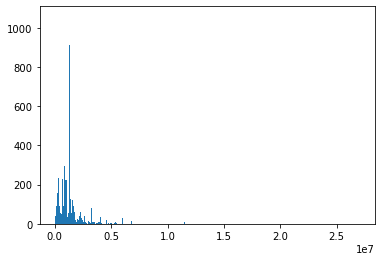

In [45]:
#Plot the basic distribution of sold homes. 
plt.hist(df_sold['Price_num'], bins =10000)

In [39]:
#We are trying to find the total number of homes that were sold in our dataset. 
df_sold['Status'].value_counts()

1    131495
Name: Status, dtype: int64

In [38]:
#Look at all the different S/A values. 
df['S/A'].value_counts()

F75      2175
F83      2126
F41      1957
F74      1769
F34      1596
         ... 
N69ML       1
N81MW       1
N77IP       1
VWHSG       1
N80HD       1
Name: S/A, Length: 658, dtype: int64

(array([2.9805e+04, 0.0000e+00, 0.0000e+00, 7.1890e+04, 0.0000e+00,
        0.0000e+00, 1.5280e+04, 0.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

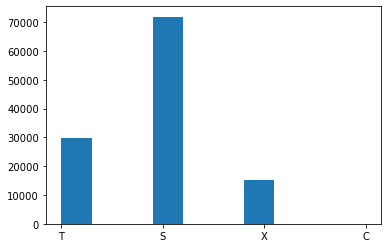

In [39]:
plt.hist(df['Status'])

In [43]:
df_test.to_csv('df_EDA.csv')

In [42]:
df_sold.to_csv('df_model_test.csv')

This is where our first notebook ends, we continue with our "Capstone Preprocessing" notebook which wil go through the process of further cleaning, converting columsn as well as dropping unnecesary columns. 
